# Reddit Legal Advice Parser(4/20/2010 - 3/29/2020)

## Load JSON

In [1]:
import json


def loadJSON():
    with open("pretty_outfile.json", "r") as f:
        json_object = json.load(f)
    return json_object

json_object = loadJSON()
print(len(json_object["data"]))


903050


In [2]:
docs = json_object['data']

print(len(docs))
print()
print(docs[-1])


903050

{'created_utc': 1585518334, 'selftext': "I'm starting a business selling machine-printed posters and tee shirts where the customer uploads an image of themselves to our website, a designer creates a digital drawing of that person and it is then printed and shipped to the person. question is, can i use a drawing that our designers make of a celebrity as an example of the art style? for clarity, this drawing will not be sold and will generate no monetary value directly as it serves no purpose other than showing the art style to people who visit our website. also, can i use the original image to show the contrast between the before and after or not? and what are the restrictions (if any) on who can i use (both as a normal pic and as a drawing)?", 'id': 'frdzlt', 'title': 'Can i use a drawing of a celebrity on my website?'}


## Submissions per Year

In [3]:
import sys
import datetime as dt
import time
from collections import defaultdict
import pandas as pd
import pylab as pl

def utc2ymd(utc: str) -> str:
    #return dt.datetime.utcfromtimestamp(utc).strftime("%Y/%m/%d %H:%M")
    return dt.datetime.utcfromtimestamp(utc).strftime("%Y-%m-%d")

def ymd2utc(ymd: str) -> int:
    utc = dt.datetime.strptime(ymd, '%Y-%m-%d')
    utc = time.mktime(utc.timetuple())
    utc = int(utc)
    return utc


def pretty(d, indent=0):
    print('------------------------------------')
    print('id: ', d['id'])
    ymd = utc2ymd(d['created_utc'])
    print('created_utc:', d['created_utc'], ymd)
    print('title:', d['title'])
    print('selftext:', d['selftext'])
    print('\n')
    print('------------------------------------')
    


utc_dict = {}
num_docs = {}

for year in range(2010, 2021):
    ymd_after = str(year) + '-01-01'
    ymd_before = str(year+1) + '-01-01'
    utc_after = ymd2utc(ymd_after)
    utc_before = ymd2utc(ymd_before)
    utc_dict[year] = (utc_after, utc_before)

print(utc_dict)


for doc in docs:
    
    for k,v in utc_dict.items():
        if v[0] <= doc['created_utc'] < v[1]:
            if k in num_docs:
                num_docs[int(k)] += 1
            else:
                num_docs[int(k)] = 1
                
cnt = 0
noselftext = 0
for doc in docs:
    if "selftext" in doc:
        cnt+= 1
        pass
    else:
        noselftext += 1
        #print(doc)

print(doc)
        
print('cnt',cnt)
print('noselftext',noselftext)

                
key_list = []
val_list = []
for k,v in num_docs.items():
    key_list.append(k)
    val_list.append(v)

/Users/heeh/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


{2010: (1262322000, 1293858000), 2011: (1293858000, 1325394000), 2012: (1325394000, 1357016400), 2013: (1357016400, 1388552400), 2014: (1388552400, 1420088400), 2015: (1420088400, 1451624400), 2016: (1451624400, 1483246800), 2017: (1483246800, 1514782800), 2018: (1514782800, 1546318800), 2019: (1546318800, 1577854800), 2020: (1577854800, 1609477200)}
{'created_utc': 1585518334, 'selftext': "I'm starting a business selling machine-printed posters and tee shirts where the customer uploads an image of themselves to our website, a designer creates a digital drawing of that person and it is then printed and shipped to the person. question is, can i use a drawing that our designers make of a celebrity as an example of the art style? for clarity, this drawing will not be sold and will generate no monetary value directly as it serves no purpose other than showing the art style to people who visit our website. also, can i use the original image to show the contrast between the before and after 

[8, 867, 5518, 19685, 42160, 82517, 109926, 133516, 188357, 255340, 65156]


Text(0, 0.5, 'Number of Submissions')

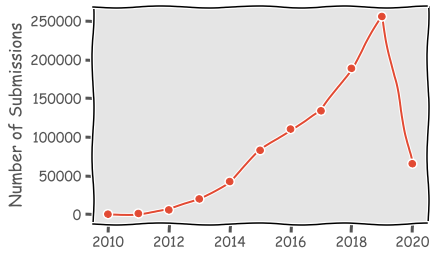

In [4]:
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
print(val_list)
matplotlib.style.use("ggplot")
plt.xkcd()
#plt.rcdefaults()    
plt.figure()

plt.plot(key_list, val_list, "-o")
plt.ylabel("Number of Submissions")